In [37]:
pip install chart_studio

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=a71b900ee8efa026a8e74eb7f0f01c3f1372a8c8abf5383a87edf9f440fc229a
  Stored in directory: c:\users\nastalique\appdata\local\pip\cache\wheels\ce\18\7f\e9527e3e66db1456194ac7f61eb3211068c409edceecff2d31
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
import statsmodels

In [3]:
dataset = pd.read_csv("Instagram.csv", encoding="latin1")

In [4]:
dataset.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920.0,2586.0,1028.0,619.0,56.0,98.0,9.0,5.0,162.0,35.0,2.0,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394.0,2727.0,1838.0,1174.0,78.0,194.0,7.0,14.0,224.0,48.0,10.0,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021.0,2085.0,1188.0,0.0,533.0,41.0,11.0,1.0,131.0,62.0,12.0,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528.0,2700.0,621.0,932.0,73.0,172.0,10.0,7.0,213.0,23.0,8.0,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518.0,1704.0,255.0,279.0,37.0,96.0,5.0,4.0,123.0,8.0,0.0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [5]:
dataset.isnull().sum()

Impressions       1
From Home         1
From Hashtags     1
From Explore      1
From Other        1
Saves             1
Comments          1
Shares            1
Likes             1
Profile Visits    1
Follows           1
Caption           1
Hashtags          1
dtype: int64

In [6]:
dataset = dataset.dropna()

In [7]:
dataset.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Impressions     99 non-null     float64
 1   From Home       99 non-null     float64
 2   From Hashtags   99 non-null     float64
 3   From Explore    99 non-null     float64
 4   From Other      99 non-null     float64
 5   Saves           99 non-null     float64
 6   Comments        99 non-null     float64
 7   Shares          99 non-null     float64
 8   Likes           99 non-null     float64
 9   Profile Visits  99 non-null     float64
 10  Follows         99 non-null     float64
 11  Caption         99 non-null     object 
 12  Hashtags        99 non-null     object 
dtypes: float64(11), object(2)
memory usage: 10.8+ KB


# Plotting Distribution from Home Column

C:\Users\Nastalique\285-ML-projects\Instagram-reach-analysis\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


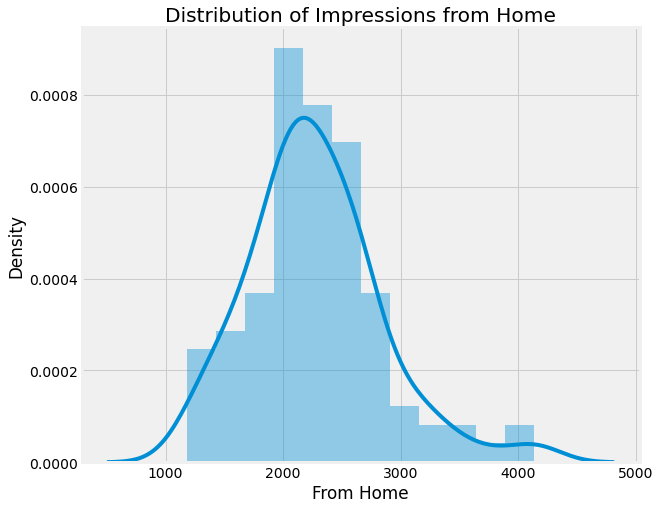

In [9]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions from Home")
sns.distplot(dataset['From Home'])
plt.show()

# Plotting Distribution from Hashtags column

C:\Users\Nastalique\285-ML-projects\Instagram-reach-analysis\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


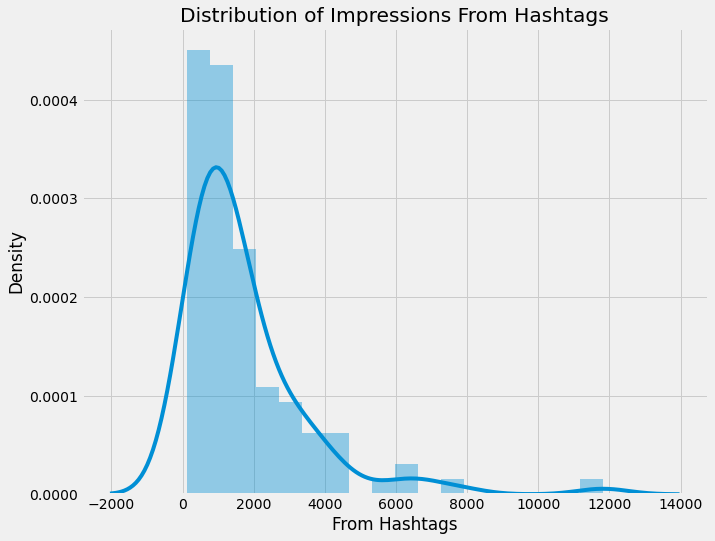

In [10]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(dataset['From Hashtags'])
plt.show()

# Plotting Distribution impressions from Explore column

C:\Users\Nastalique\285-ML-projects\Instagram-reach-analysis\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


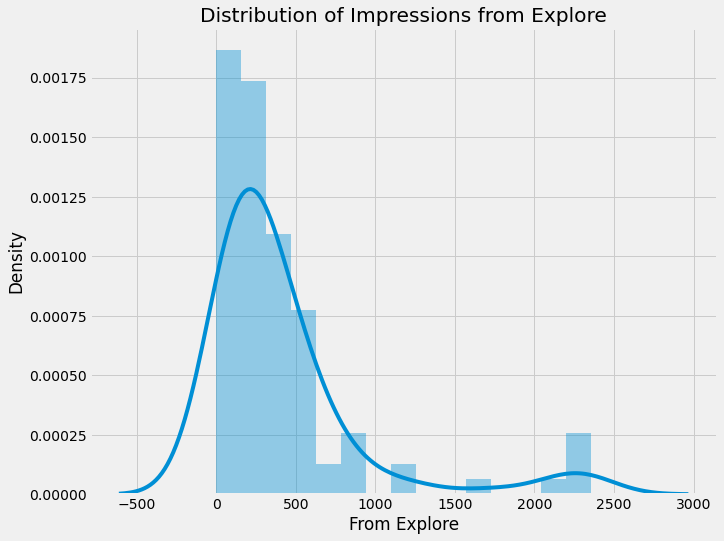

In [11]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions from Explore")
sns.distplot(dataset["From Explore"])
plt.show()

In [46]:
home = dataset['From Home'].sum()
hashtags = dataset['From Hashtags'].sum()
explore = dataset['From Explore'].sum()
other = dataset['From Other'].sum()

labels = ['From Home', 'From Hashtags', 'From Explore', 'Other']
values = [home, hashtags, explore, other]

fig = px.pie(dataset, values= values, names = labels, title = "Impression on Instagram Posts from Various sources", hole = 0.5)
fig.write_html('fig.html', auto_open = True)


In [33]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


# Analyzing what type of content was in the Captions of the posts.

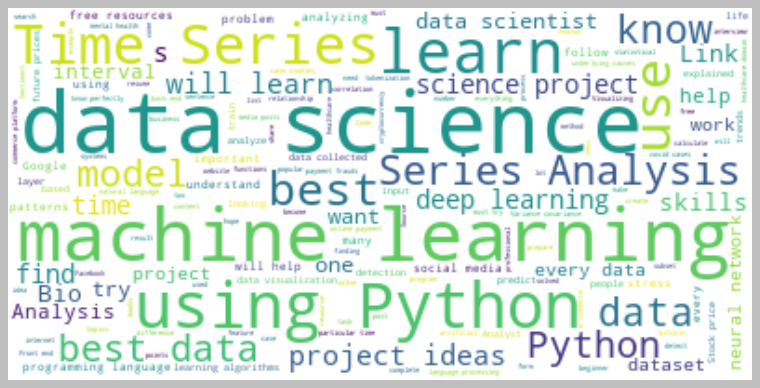

In [16]:
text = " ".join(i for i in dataset.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Analyzing what type of content was in Hashtags.

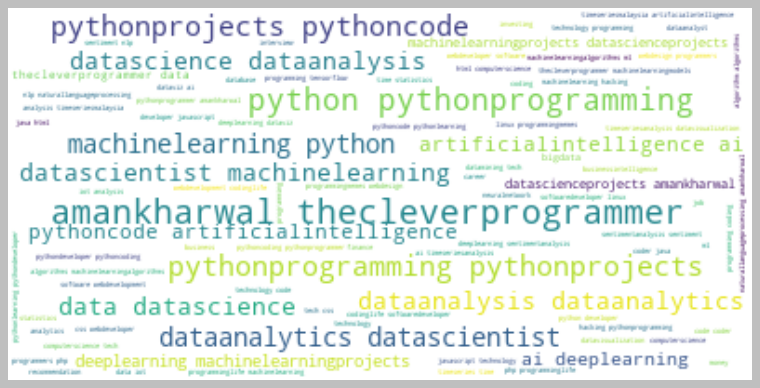

In [17]:
text = " ".join(i for i in dataset.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Analyzing Relationships (How the Instagram Algorithm works)

In [44]:
fig1 = plt.figure()
figure = px.scatter(data_frame = dataset, x="Impressions", y = "Likes", size = "Likes", trendline= 'ols', title="Relationship between Likes and Impressions")
figure.write_html('fig.html', auto_open=True)

<Figure size 640x480 with 0 Axes>

# Analyzing Relationship between Number of Comments and the number of Impressions on the Instagram posts

In [48]:
figure1 = px.scatter(data_frame = dataset, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figure1.write_html('figure1.html', auto_open = True)

# Analyzing Relationship between the Number of shares and the Number of impressions

In [50]:
figure2 = px.scatter(data_frame = dataset, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.write_html('figure2.html', auto_open = True)

# Analyzing Relationship between Impressions and the number of saves

In [53]:
figure3 = px.scatter(data_frame = dataset, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figure3.write_html('figure3.html', auto_open = True)

# Lets look at the correlation of all the columns with the Impressions column

In [54]:
correlation = dataset.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
Likes             0.896277
From Hashtags     0.892682
Follows           0.804064
Profile Visits    0.774393
Saves             0.625600
From Home         0.603378
From Explore      0.498389
Shares            0.476617
From Other        0.429227
Comments          0.247201
Name: Impressions, dtype: float64


# Analyzing Conversion Rate

In [56]:
conversion_rate = (dataset["Follows"].sum() / dataset["Profile Visits"].sum()) * 100
print(conversion_rate)

31.17770767613039


In [58]:
figure4 = px.scatter(data_frame = dataset, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure4.write_html('figure4.html', auto_open = True)

# Instagram Reach Prediction Model

In [59]:
X = np.array(dataset[['Likes', 'Saves','Comments','Shares', 'Profile Visits', 'Follows']])
y = np.array(dataset["Impressions"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
model = PassiveAggressiveRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9126597097647348

# Let's Predict

In [61]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([10629.73478368])